In [1]:
import yfinance as yf


tesla_stock = yf.Ticker("TSLA")


tesla_stock_data = tesla_stock.history(period="max")


print(tesla_stock_data)


tesla_stock_data.to_csv("tesla_stock_data.csv")


                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-01-13 00:00:00-05:00  383.209991  403.790009  380.070007  403.309998   
2025-01-14 00:00:00-05:00  414.339996  422.640015  394.540009  396.359985   
2025-01-15 00:00:00-05:00  409.899994  429.799988  405.660004  428.220001   
2025-01-16 00:00:00-05:00  423.489990  424.000000  409.130005  413.820007   
2025-01-17 00:00:00-05:00  421.500000  439.739990  419.750000  426.500000   

In [2]:
import yfinance as yf

tesla_stock = yf.Ticker("TSLA")
tesla_stock_data = tesla_stock.history(period="max")
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.to_csv("tesla_stock_data.csv", index=False)
print(tesla_stock_data.head())



                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [5]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
revenue_table = soup.find("table", attrs={"class": "historical_data_table"})

if revenue_table:
    rows = revenue_table.find_all("tr")
    data = []
    for row in rows:
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        if len(cols) == 2:  # Ensure rows with exactly two columns
            data.append(cols)

    header = ["Date", "Revenue"]
    revenue_data = pd.DataFrame(data, columns=header)

    revenue_data.to_csv("tesla_revenue_data.csv", index=False)
    print(revenue_data.head())
else:
    print("Revenue table not found on the page.")


Revenue table not found on the page.


In [6]:
# Question 1: Import yfinance and download stock data for GameStop
import yfinance as yf

# Download GameStop (GME) stock data for the past 5 years
gme_data = yf.download("GME", start="2018-01-01", end="2023-01-01")

# Question 2: Display the first five rows of the DataFrame
print("First five rows of gme_data:")
print(gme_data.head())

# Question 3: Reset the index, save, and display the first five rows of the gme_data DataFrame
gme_data = gme_data.reset_index()
print("\nFirst five rows after resetting index:")
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

First five rows of gme_data:
Price          Close      High       Low      Open    Volume
Ticker           GME       GME       GME       GME       GME
Date                                                        
2018-01-02  3.988465  3.995018  3.883620  3.922936  11330800
2018-01-03  3.975358  4.012491  3.914199  3.995017  15156800
2018-01-04  4.001570  4.014675  3.922936  3.975359  11125200
2018-01-05  4.080203  4.091124  3.979727  4.014675  12076000
2018-01-08  4.200337  4.237470  4.106414  4.106414  14673600

First five rows after resetting index:
Price        Date     Close      High       Low      Open    Volume
Ticker                  GME       GME       GME       GME       GME
0      2018-01-02  3.988465  3.995018  3.883620  3.922936  11330800
1      2018-01-03  3.975358  4.012491  3.914199  3.995017  15156800
2      2018-01-04  4.001570  4.014675  3.922936  3.975359  11125200
3      2018-01-05  4.080203  4.091124  3.979727  4.014675  12076000
4      2018-01-08  4.200337  4.2374

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://finance.yahoo.com/quote/GME/financials?p=GME"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
financial_table = soup.find_all('table')[0]
headers = [header.get_text() for header in financial_table.find_all('th')]
rows = financial_table.find_all('tr')

data = []
for row in rows[1:]:
    cells = row.find_all('td')
    if len(cells) > 1:
        data.append([cell.get_text() for cell in cells])

gme_revenue = pd.DataFrame(data, columns=headers)
print("Last five rows of gme_revenue:")
print(gme_revenue.tail())


Last five rows of gme_revenue:
Empty DataFrame
Columns: []
Index: []


[*********************100%***********************]  1 of 1 completed


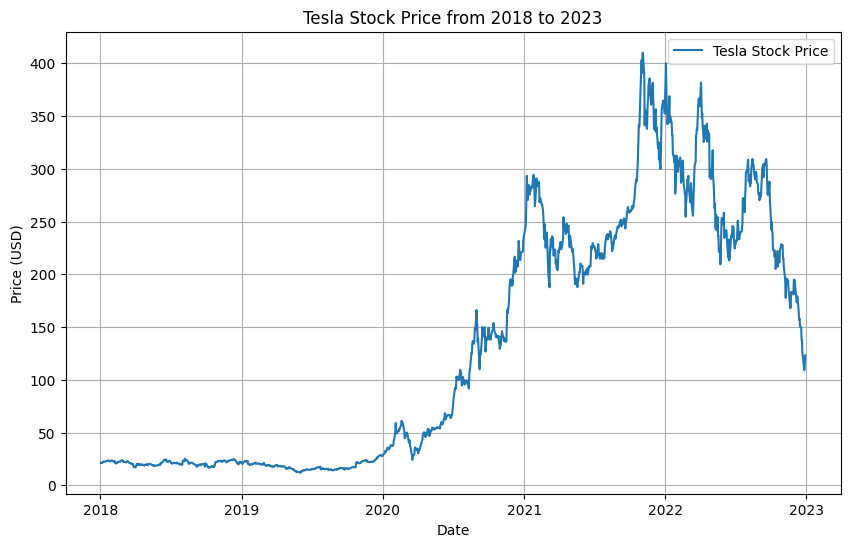

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Tesla Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

tesla_data = yf.download("TSLA", start="2018-01-01", end="2023-01-01")
make_graph(tesla_data, 'Tesla Stock Price from 2018 to 2023')


[*********************100%***********************]  1 of 1 completed


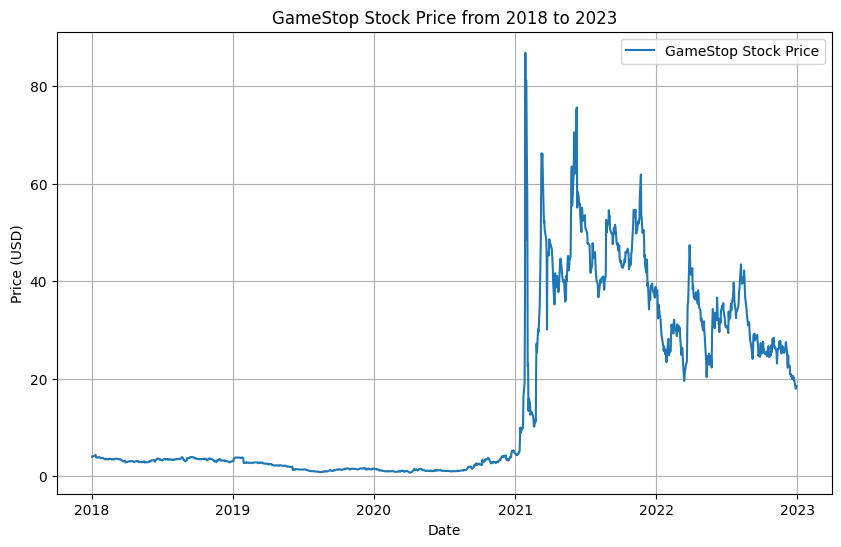

<Figure size 640x480 with 0 Axes>

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='GameStop Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('ques6.png')

gme_data = yf.download("GME", start="2018-01-01", end="2023-01-01")
make_graph(gme_data, 'GameStop Stock Price from 2018 to 2023')
